In [1]:
#Importing required modules

import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import csv
import os
from PIL import Image


In [2]:
#Importing MNIST dataset for training and validation testing purposes

mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
# Save image parameters to the constants that we will use later for data re-shaping
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape 
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);



IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [4]:
#Given dataset is stored in the file 'opdata1.csv' in the same directory

with open('opdata1.csv', 'r') as file: 
    reader = csv.reader(file)
    #Training and testing lists are found from the digit & operator recognition of given dataset images
    x_list = []
    x_train_list = []
    y_list = []
    y_train_list = [] 
    i=0
    for row in reader:
        imageName = row[0]
        operator_name = row[1]
        #print(imageName)
        #path = "C:\\Users\\Aadarsh Gupta\\imgdata" 
        path = os.path.join("imgdata", imageName)
        if(os.path.exists(path)and imageName!=""):
            im = Image.open(path, "r")
            #im = list(im.getdata()) im = np.array(im)
            #if (i>200):
            #    break 
            
            #The above obtained dataset is bifurcated in two proportions as : Training (70%), Testing (30%)
            if(i<0.7*50000):
                im = np.array(im)
                x_list.append(im) 
                if(operator_name=="plus"):
                    y_list.append(10) 
                if(operator_name=="minus"):
                    y_list.append(11) 
                if(operator_name=="mul"): 
                    y_list.append(12) 
                if(operator_name=="div"):
                    y_list.append(13) 
            else:
                im = np.array(im)
                x_train_list.append(im)

                if(operator_name=="plus"):
                    y_train_list.append(10) 
                if(operator_name=="minus"):
                    y_train_list.append(11)
                if(operator_name=="mul"):
                    y_train_list.append(12)
                if(operator_name=="div"): 
                    y_train_list.append(13)
        i+=1
    x_list = np.array(x_list)
    y_list = np.array(y_list)
    x_train_list = np.array(x_train_list)
    y_train_list = np.array(y_train_list)
    # print csv content of row can remove it
    print(x_list.shape)
    print(type(x_train), type(y_train), type(x_list), type(y_list), type(x_train_list))
    
    #Datasets are merged with the dataset obtained from MNIST
    x_train = np.concatenate((x_train, x_list))
    y_train = np.concatenate((y_train, y_list))
    x_test = np.concatenate((x_test, x_train_list))
    y_test = np.concatenate((y_test, y_train_list))
    print('x_train:', x_train.shape) 
    print('y_train:', y_train.shape) 
    print('x_test:', x_test.shape) 
    print('y_test:', y_test.shape)
    


(17500, 28, 28)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
x_train: (77500, 28, 28)
y_train: (77500,)
x_test: (12741, 28, 28)
y_test: (12741,)


In [5]:
#Reshaping the obtained dataset(training & test) to ndim = 4

x_train_with_chanels = x_train.reshape( 
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape( 
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

print('x_train_with_chanels:', x_train_with_chanels.shape) 
print('x_test_with_chanels:', x_test_with_chanels.shape)



x_train_with_chanels: (77500, 28, 28, 1)
x_test_with_chanels: (12741, 28, 28, 1)


In [7]:
#Normalisation of pixel values of training and test data 

x_train_normalized = x_train_with_chanels / 255 
x_test_normalized = x_test_with_chanels / 255

print('x_train_normalized:', x_train_normalized.shape) 
print('x_test_normalized:', x_test_normalized.shape)

x_train_normalized: (77500, 28, 28, 1)
x_test_normalized: (12741, 28, 28, 1)


In [8]:
#Addition of Layers to CNN Architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Dense(14,activation=tf.nn.softmax))




In [9]:
#Summary of CNN Architecture used

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

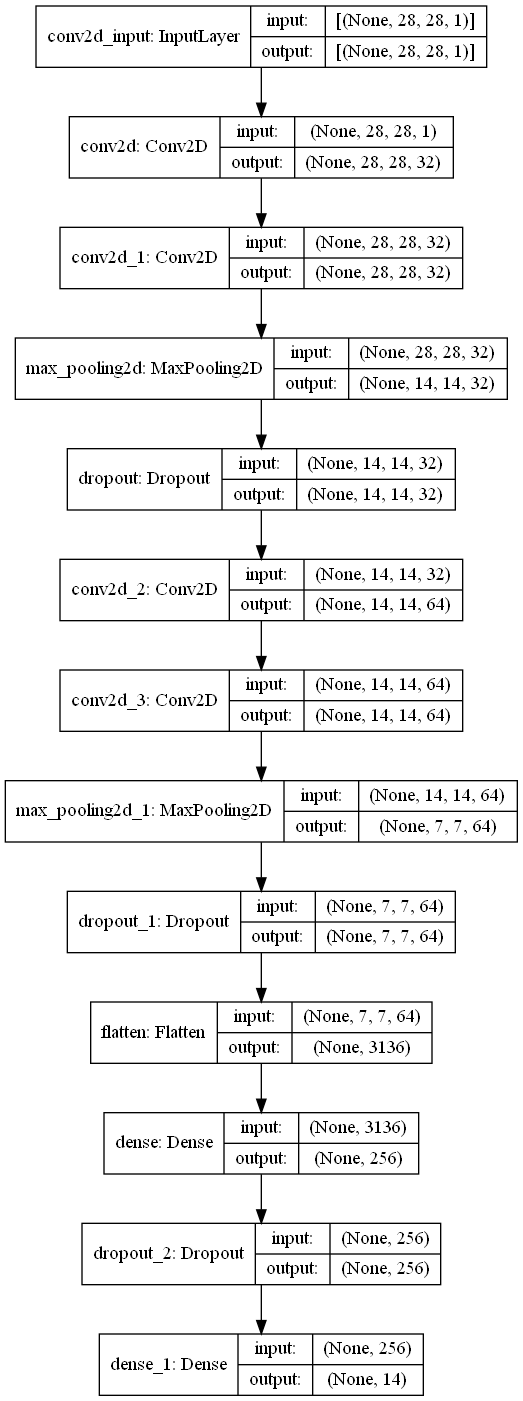

In [10]:
#Pictorial Representation of CNN Architecture (includes dimensions of inputs and outputs)

tf.keras.utils.plot_model( 
    model,
    show_shapes=True,
    show_layer_names=True, 
)



In [11]:
#Efficient adam optimizer with loss used as 'sparse_categorical_crossentropy'

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer, 
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)



In [12]:
# Training process with epochs = 20
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit( 
    x_train_normalized,
    y_train,
    epochs=20, 
    validation_data=(x_test_normalized, y_test), 
    callbacks=[tensorboard_callback]
)



Epoch 1/20
2422/2422 [==============================] - 244s 100ms/step - loss: 0.2978 - accuracy: 0.9064 - val_loss: 0.1877 - val_accuracy: 0.9389
Epoch 2/20
2422/2422 [==============================] - 241s 100ms/step - loss: 0.2013 - accuracy: 0.9380 - val_loss: 0.1642 - val_accuracy: 0.9469
Epoch 3/20
2422/2422 [==============================] - 242s 100ms/step - loss: 0.1880 - accuracy: 0.9419 - val_loss: 0.1687 - val_accuracy: 0.9457
Epoch 4/20
2422/2422 [==============================] - 238s 98ms/step - loss: 0.1803 - accuracy: 0.9438 - val_loss: 0.1654 - val_accuracy: 0.9476
Epoch 5/20
2422/2422 [==============================] - 241s 99ms/step - loss: 0.1740 - accuracy: 0.9451 - val_loss: 0.1651 - val_accuracy: 0.9467
Epoch 6/20
2422/2422 [==============================] - 247s 102ms/step - loss: 0.1707 - accuracy: 0.9458 - val_loss: 0.1592 - val_accuracy: 0.9479
Epoch 7/20
2422/2422 [==============================] - 245s 101ms/step - loss: 0.1668 - accuracy: 0.9469 - val_lo

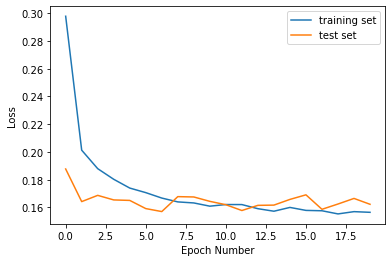

In [13]:
# Plot of Loss vs Epoch Number for Training and Validation Test data

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set') 
plt.legend()



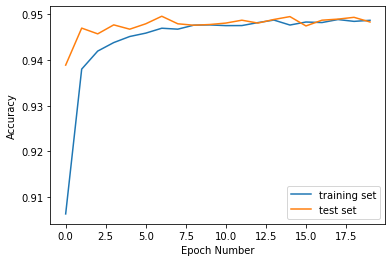

In [14]:
# Plot of Accuracy vs Epoch Number for Training and Validation Test data

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy') 
plt.plot(training_history.history['accuracy'], label='training set') 
plt.plot(training_history.history['val_accuracy'], label='test set') 
plt.legend()


In [17]:
#Evaluating Training Loss & Accuracy


train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

2422/2422 [==============================] - 29s 12ms/step - loss: 0.1388 - accuracy: 0.9523
Training loss:  0.13880613446235657
Training accuracy:  0.9523354768753052


In [19]:
#Evaluating Validation Loss & Accuracy


validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

399/399 [==============================] - 5s 12ms/step - loss: 0.1623 - accuracy: 0.9483
Validation loss:  0.16227954626083374
Validation accuracy:  0.9482772350311279


In [20]:
#Saving the model

model_name = 'digits_recognition_cnn.h5' 
model.save(model_name, save_format='h5')


In [22]:

loaded_model = tf.keras.models.load_model(model_name)
predictions_one_hot = loaded_model.predict([x_test_normalized]) 
print('predictions_one_hot:', predictions_one_hot.shape)


predictions_one_hot: (12741, 14)


In [23]:
#Prediction probability for each feature (0,1,2,3,4,5,6,7,8,9,+,-,*,/)

pd.DataFrame(predictions_one_hot)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,5.510737e-17,1.475237e-12,9.095154e-13,6.342529e-17,4.799622e-14,9.159509e-18,2.838952e-21,1.000000e+00,8.850692e-16,2.906911e-11,8.764050e-15,1.514526e-14,1.605628e-14,1.329020e-13
1,3.440144e-12,6.195694e-11,1.000000e+00,7.794351e-13,1.740041e-16,1.587167e-18,4.457119e-12,7.021189e-15,7.264274e-13,2.878863e-16,6.334949e-13,1.587336e-11,1.108082e-12,5.267613e-11
2,1.332238e-13,1.000000e+00,8.994029e-13,2.389065e-17,1.166199e-11,2.898810e-12,4.511043e-12,2.468138e-10,2.121484e-10,5.304699e-14,6.650411e-10,2.056973e-11,1.513103e-10,1.506572e-09
3,9.999998e-01,1.059774e-12,1.698219e-09,1.599615e-10,6.833668e-11,3.307601e-09,1.121453e-08,1.282498e-11,9.146130e-08,5.806707e-08,2.498933e-13,1.094672e-13,2.152324e-11,1.401166e-11
4,2.082866e-12,2.023240e-08,5.892936e-14,7.562257e-16,9.999959e-01,7.553405e-09,8.017777e-11,7.293480e-10,6.270021e-10,4.013406e-06,1.755398e-09,1.633817e-11,2.419753e-10,1.101319e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,2.757582e-10,1.756737e-11,8.294645e-09,5.464956e-10,3.456793e-12,1.282719e-08,4.200402e-10,4.279360e-10,9.946768e-11,1.277335e-09,8.971491e-03,8.347704e-01,5.411822e-04,1.557168e-01
12737,1.816961e-08,4.018078e-11,1.026728e-07,1.598473e-08,7.806569e-11,2.338484e-06,3.244691e-08,5.100849e-08,1.627704e-08,1.264346e-08,6.095042e-03,8.336237e-01,1.480217e-03,1.587984e-01
12738,3.363821e-15,1.006464e-08,5.009011e-11,1.328642e-10,7.449784e-10,5.773601e-11,2.808109e-10,1.463682e-07,5.694700e-12,3.073048e-10,8.499460e-01,3.116363e-03,9.644247e-03,1.372932e-01
12739,3.715037e-19,1.670277e-17,3.924793e-17,3.118305e-13,6.697176e-21,1.967099e-09,4.692355e-14,3.459513e-16,1.809795e-15,7.600970e-15,6.708845e-05,9.174502e-02,4.734450e-07,9.081874e-01


In [24]:
#Predictiing the digit/operator by choosing maximum probability

predictions = np.argmax(predictions_one_hot, axis=1) 
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
12736,11
12737,11
12738,10
12739,13


In [50]:
from PIL import Image, ImageOps

with open("annotations.csv", 'r') as file:
    reader = csv.reader(file)
    i = 0
    j=0
    for row in reader:
        if (i<2000):
            imageName = row[0]
            expression_type = row[1]
            expression_value = row[2]
            path = "C:\\Users\\Aadarsh Gupta\\SoML-50\\data"
            path = os.path.join(path, imageName)
            
            if(os.path.exists(path)):
                
                im = Image.open(path, "r")
                width, height = im.size
                im = ImageOps.invert(im)
                # box1 is 0  to width/3 
                box1 = (0, 0, width/3, height)
                # box2 is width/3 to 2*width/3
                box2 = (width/3, 0, 2*width/3, height)
                # box3 is 2*width/3 to width
                box3 = (2*width/3, 0, width, height)
                dig1 = ""
                dig2 = ""
                op = ""
                

                if(expression_type == "infix"):
                    dig1 = im.crop(box1)
                    op = im.crop(box2)
                    dig2 = im.crop(box3)
                elif(expression_type == "prefix"):
                    op = im.crop(box1)
                    dig1 = im.crop(box2)
                    dig2 = im.crop(box3)
                else:
                    dig1 = im.crop(box1)
                    dig2 = im.crop(box2)
                    op = im.crop(box3)


                dig1 = dig1.resize((28,28))
                np.array(dig1)
                dig2 = dig2.resize((28,28))
                np.array(dig2)
                op = op.resize((28,28))
                np.array(op)

                pix1 = list(list(dig1.getdata()))
                pixel1 = np.array(pix1)
                pixel1 = pixel1/255
                pixel1 = pixel1.reshape(1,28,28,1)


                pix2 = list(list(dig2.getdata()))
                pixel2 = np.array(pix2)
                pixel2 = pixel2/255
                pixel2 = pixel2.reshape(1,28,28,1)
                
                pix3 = list(list(op.getdata()))
                pixel3 = np.array(pix3)
                pixel3 = pixel3/255
                pixel3 = pixel3.reshape(1,28,28,1)


              
                # this is original but for now i keep fixed 
                dig1 = np.argmax(loaded_model.predict(pixel1), axis =1)[0]
                dig1 = int(dig1)
                dig2 = np.argmax(loaded_model.predict(pixel2), axis =1)[0]
                dig2 = int(dig2)
                op = np.argmax(loaded_model.predict(pixel3), axis =1)[0]
                op = int(op)
                expression_value = int(expression_value)
                if(op==10):
                    if(dig1+dig2==expression_value):
                        
                        j=j+1
                        
                    #print(dig1,dig2,"+",dig1+dig2,expression_value)
                elif(op==11):
                    if(dig1-dig2==expression_value):
                        j=j+1
                        
                    #print(dig1,dig2,"-",dig1-dig2,expression_value)
                elif(op==12):
                    if(dig1*dig2==expression_value):
                        j=j+1
                        
                    #print(dig1,dig2,"*",dig1*dig2,expression_value)
                elif(op==13):
                    if (dig2!=0):
                        
                        if(dig1//dig2==expression_value):
                            j=j+1
                    else :
                        if (expression_value == 0) :
                            j=j+1
                        
                            
                        #print(dig1,dig2,"/",dig1//dig2,expression_value)
                #value = int(expression_value)
                    
        i= i+1
    print(j)
   

685


In [51]:
count = 0
i = 0
with open('opdata1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        imageName = row[0]
        expression_type = row[1]
        path = os.path.join("imgdata", imageName)
        if(os.path.exists(path) and imageName!=""):
            if(i<300):
                im = Image.open(path, "r")
                pix = list(list(im.getdata()))
                pixel = np.array(pix)
                pixel = pixel/255
                pixel = pixel.reshape(1,28,28,1) 
                predictions_one_hot1 = loaded_model.predict(pixel)
                predictions = np.argmax(predictions_one_hot1, axis=1) 
                pd.DataFrame(predictions)
                if(predictions[0]==10 and expression_type=="plus"):
                    count=count+1
                elif(predictions[0]==11 and expression_type=="minus"):
                    count=count+1
                elif(predictions[0]==12 and expression_type=="mul"):
                    count=count+1
                elif(predictions[0]==13 and expression_type=="div"):
                    count=count+1
                i=i+1
            else:
                break
    print(count)

234
